In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [3]:
pwd

'/Users/mac/Documents/Projects/Kmeans Clustering Projects'

In [4]:
import os

In [5]:
os.listdir()

['Live_20210128.csv',
 'players_22.csv',
 'K Means Clustering Project.html',
 'Mall_Customers (1).csv',
 'Live.csv',
 '.DS_Store',
 'Untitled.ipynb',
 'means clustering on Fifa Dataset.ipynb',
 'CC GENERAL.csv',
 'Bangalore_cafe_long_and_lat.csv',
 '(85) K-Means Clustering For Machine Learning Real Life Project _ LinkedIn.html',
 'WineQT.csv',
 'K Means Clustering Project_files',
 '(85) K-Means Clustering For Machine Learning Real Life Project _ LinkedIn_files',
 '.ipynb_checkpoints']

In [6]:
players = pd.read_csv('players_22.csv')

/var/folders/3p/6lcj2md57tb4mzk7w10wzkgr0000gn/T/ipykernel_2609/2731654625.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('players_22.csv')


In [7]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [8]:
# Features to cluster By:

features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [9]:
players = players.dropna(subset=features)

In [10]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [11]:
data = players[features]

In [12]:
data2 = players[features]

In [13]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [14]:
data.apply(lambda x: x.isnull().sum())

overall      0
potential    0
value_eur    0
wage_eur     0
age          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   value_eur  19165 non-null  float64
 3   wage_eur   19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


In [16]:
data.shape

(19165, 5)

Exploratory Data Analysis

1. Feature Engineering

2. Kmeans clustering Algorithms

In [17]:
data = (data - data.min()) / (data.max() - data.min())

In [18]:
data

,overall,potential,value_eur,wage_eur,age
0,1.000000,0.956522,0.402034,0.914163,0.666667
1,0.978261,0.934783,0.615962,0.771102,0.592593
2,0.956522,0.913043,0.231923,0.771102,0.740741
3,0.956522,0.913043,0.664933,0.771102,0.481481
4,0.956522,0.913043,0.646891,1.000000,0.518519
...,...,...,...,...,...
19234,0.000000,0.065217,0.000314,0.001431,0.222222
19235,0.000000,0.217391,0.000521,0.000000,0.111111
19236,0.000000,0.130435,0.000469,0.000000,0.185185
19237,0.000000,0.239130,0.000521,0.000000,0.111111


In [19]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,0.407830,0.480000,0.014647,0.024383,0.340372
std,0.149626,0.132342,0.039248,0.055725,0.175093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.391304,0.002402,0.001431,0.185185
50%,0.413043,0.478261,0.004980,0.007153,0.333333
75%,0.500000,0.565217,0.010263,0.021459,0.481481
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit_transform(data2)

array([[1.00000000e+00, 9.56521739e-01, 4.02034115e-01, 9.14163090e-01,
        6.66666667e-01],
       [9.78260870e-01, 9.34782609e-01, 6.15961565e-01, 7.71101574e-01,
        5.92592593e-01],
       [9.56521739e-01, 9.13043478e-01, 2.31923130e-01, 7.71101574e-01,
        7.40740741e-01],
       ...,
       [0.00000000e+00, 1.30434783e-01, 4.69093927e-04, 0.00000000e+00,
        1.85185185e-01],
       [0.00000000e+00, 2.39130435e-01, 5.20642710e-04, 0.00000000e+00,
        1.11111111e-01],
       [0.00000000e+00, 2.39130435e-01, 5.20642710e-04, 0.00000000e+00,
        1.11111111e-01]])

In [21]:
data2 = pd.DataFrame(scale.fit_transform(data2), columns=data.columns)

In [22]:
data2

,overall,potential,value_eur,wage_eur,age
0,1.000000,0.956522,0.402034,0.914163,0.666667
1,0.978261,0.934783,0.615962,0.771102,0.592593
2,0.956522,0.913043,0.231923,0.771102,0.740741
3,0.956522,0.913043,0.664933,0.771102,0.481481
4,0.956522,0.913043,0.646891,1.000000,0.518519
...,...,...,...,...,...
19160,0.000000,0.065217,0.000314,0.001431,0.222222
19161,0.000000,0.217391,0.000521,0.000000,0.111111
19162,0.000000,0.130435,0.000469,0.000000,0.185185
19163,0.000000,0.239130,0.000521,0.000000,0.111111


Step 1: Randomly generate the centroids having K amount

In [23]:
centroid = data.apply(lambda x: float(x.sample()))

In [24]:
centroid

overall      0.391304
potential    0.326087
value_eur    0.005624
wage_eur     0.035765
age          0.370370
dtype: float64

In [25]:
centroid.values

array([0.39130435, 0.32608696, 0.00562397, 0.03576538, 0.37037037])

In [26]:
def randonly_gen_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    
    return pd.concat(centroids, axis=1)

In [27]:
centroids = randonly_gen_centroids(data, 5)

In [28]:
centroids

,0,1,2,3,4
overall,0.521739,0.652174,0.282609,0.500000,0.260870
potential,0.586957,0.543478,0.630435,0.760870,0.282609
value_eur,0.046348,0.422654,0.004593,0.001500,0.002531
wage_eur,0.001431,0.000000,0.032904,0.087268,0.000572
age,0.370370,0.370370,0.555556,0.333333,0.037037


step 2: Label each data point

In [29]:
distance1 = np.sqrt(((data - centroids.iloc[:, 0])**2))

In [30]:
distance1

,overall,potential,value_eur,wage_eur,age
0,0.478261,0.369565,0.355687,0.912732,0.296296
1,0.456522,0.347826,0.569614,0.769671,0.222222
2,0.434783,0.326087,0.185576,0.769671,0.370370
3,0.434783,0.326087,0.618585,0.769671,0.111111
4,0.434783,0.326087,0.600543,0.998569,0.148148
...,...,...,...,...,...
19234,0.521739,0.521739,0.046033,0.000000,0.148148
19235,0.521739,0.369565,0.045827,0.001431,0.259259
19236,0.521739,0.456522,0.045878,0.001431,0.185185
19237,0.521739,0.347826,0.045827,0.001431,0.259259


In [31]:
np.sqrt(((data - centroids.iloc[:, 0])**2))

,overall,potential,value_eur,wage_eur,age
0,0.478261,0.369565,0.355687,0.912732,0.296296
1,0.456522,0.347826,0.569614,0.769671,0.222222
2,0.434783,0.326087,0.185576,0.769671,0.370370
3,0.434783,0.326087,0.618585,0.769671,0.111111
4,0.434783,0.326087,0.600543,0.998569,0.148148
...,...,...,...,...,...
19234,0.521739,0.521739,0.046033,0.000000,0.148148
19235,0.521739,0.369565,0.045827,0.001431,0.259259
19236,0.521739,0.456522,0.045878,0.001431,0.185185
19237,0.521739,0.347826,0.045827,0.001431,0.259259


In [32]:
# Applying to all columns 

distances = centroids.apply(lambda x: np.sqrt((data - x)**2).sum(axis=1))

In [33]:
distances 

,0,1,2,3,4
0,2.412541,1.991948,2.433289,2.256415,3.355767
1,2.365855,1.904023,2.386603,2.209729,3.309081
2,2.086487,2.006115,2.107234,1.930360,3.029712
3,2.260237,1.798405,2.429133,2.104111,3.203463
4,2.508130,2.046298,2.602952,2.352004,3.451356
...,...,...,...,...,...
19234,1.237659,1.702353,1.216912,1.393786,0.666521
19235,1.197821,1.659653,1.177073,1.353947,0.402744
19236,1.210755,1.672587,1.190007,1.366881,0.563826
19237,1.176082,1.637914,1.155334,1.332208,0.381005


In [34]:
distances.idxmin(axis=1)  #cluster assignment

0        1
1        1
2        3
3        1
4        1
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [35]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt((data - x)**2).sum(axis=1))
    return distances.idxmin(axis=1)

In [36]:
labels = get_labels(data, centroids)

In [37]:
labels

0        1
1        1
2        3
3        1
4        1
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [38]:
# count each players in each clusters

labels.value_counts()

0    9349
4    5767
2    2457
3    1519
1      73
dtype: int64

In [39]:
data.groupby(labels).mean()

,overall,potential,value_eur,wage_eur,age
0,0.480623,0.510947,0.012819,0.026229,0.377771
1,0.867183,0.869267,0.443026,0.497168,0.393709
2,0.389473,0.350967,0.002765,0.008129,0.584438
3,0.596259,0.725191,0.071358,0.098877,0.256016
4,0.242199,0.415294,0.002314,0.002709,0.197304


In [40]:
new_distance = distances.apply(lambda x: x.sum() / x.shape[0])

In [41]:
new_distance

0    0.507720
1    0.952774
2    0.611864
3    0.658025
4    0.717101
dtype: float64

In [42]:
distances.apply(lambda x: x.mean())

0    0.507720
1    0.952774
2    0.611864
3    0.658025
4    0.717101
dtype: float64

In [43]:
data.groupby(labels).mean()

,overall,potential,value_eur,wage_eur,age
0,0.480623,0.510947,0.012819,0.026229,0.377771
1,0.867183,0.869267,0.443026,0.497168,0.393709
2,0.389473,0.350967,0.002765,0.008129,0.584438
3,0.596259,0.725191,0.071358,0.098877,0.256016
4,0.242199,0.415294,0.002314,0.002709,0.197304


In [44]:
data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,0,1,2,3,4
overall,0.472628,0.865758,0.381533,0.582076,0.000000
potential,0.504285,0.867885,0.000000,0.723468,0.396005
value_eur,0.009149,0.427566,0.000000,0.043999,0.001953
wage_eur,0.000000,0.451454,0.000000,0.000000,0.000000
age,0.352060,0.372123,0.573742,0.000000,0.000000


In [45]:
data.groupby(labels)[features].sum()

,overall,potential,value_eur,wage_eur,age
0,4493.347826,4776.847826,119.843957,245.212446,3531.777778
1,63.304348,63.456522,32.340897,36.293276,28.740741
2,956.934783,862.326087,6.793233,19.971960,1435.962963
3,905.717391,1101.565217,108.393322,150.193562,388.888889
4,1396.760870,2395.000000,13.344830,15.621459,1137.851852


In [46]:
data.groupby(labels)[features].apply(lambda x: x.sum())

,overall,potential,value_eur,wage_eur,age
0,4493.347826,4776.847826,119.843957,245.212446,3531.777778
1,63.304348,63.456522,32.340897,36.293276,28.740741
2,956.934783,862.326087,6.793233,19.971960,1435.962963
3,905.717391,1101.565217,108.393322,150.193562,388.888889
4,1396.760870,2395.000000,13.344830,15.621459,1137.851852


In [47]:
data.groupby(labels)[features].apply(lambda x: x.sum() / x.shape[0])

,overall,potential,value_eur,wage_eur,age
0,0.480623,0.510947,0.012819,0.026229,0.377771
1,0.867183,0.869267,0.443026,0.497168,0.393709
2,0.389473,0.350967,0.002765,0.008129,0.584438
3,0.596259,0.725191,0.071358,0.098877,0.256016
4,0.242199,0.415294,0.002314,0.002709,0.197304


In [48]:
data.groupby(labels)[features].apply(lambda x: np.exp(np.log(x.sum() / x.shape[0])))

,overall,potential,value_eur,wage_eur,age
0,0.480623,0.510947,0.012819,0.026229,0.377771
1,0.867183,0.869267,0.443026,0.497168,0.393709
2,0.389473,0.350967,0.002765,0.008129,0.584438
3,0.596259,0.725191,0.071358,0.098877,0.256016
4,0.242199,0.415294,0.002314,0.002709,0.197304


In [49]:
def new_centroids(data, labels, feature):
    return data.groupby(labels)[feature].apply(lambda x: x.sum() / x.shape[0]).T

In [50]:
new_centroids(data, labels, features)

,0,1,2,3,4
overall,0.480623,0.867183,0.389473,0.596259,0.242199
potential,0.510947,0.869267,0.350967,0.725191,0.415294
value_eur,0.012819,0.443026,0.002765,0.071358,0.002314
wage_eur,0.026229,0.497168,0.008129,0.098877,0.002709
age,0.377771,0.393709,0.584438,0.256016,0.197304


In [51]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [52]:
# Function to plot clusters

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

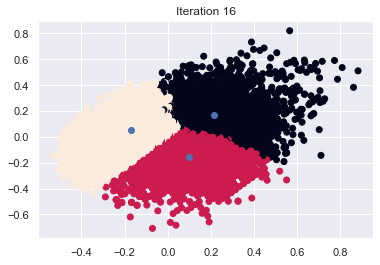

In [53]:
max_iterations = 100
k = 3

centroids = randonly_gen_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, features)
    plot_clusters(data, labels, centroids, iteration)
    iteration = iteration + 1

Confirming

In [54]:
players[labels == 0]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,230882,https://sofifa.com/player/230882/jack-simpson/...,J. Simpson,Jack Benjamin Simpson,"CB, LB",68,76,2500000.0,15000.0,24,...,68+2,68+2,68+2,62+2,13+2,https://cdn.sofifa.net/players/230/882/22_120.png,https://cdn.sofifa.net/teams/86/60.png,https://cdn.sofifa.net/flags/gb-sct.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
7103,237435,https://sofifa.com/player/237435/ryotaro-meshi...,R. Meshino,食野 亮太郎,"LW, ST",68,76,2700000.0,35000.0,23,...,35+2,35+2,35+2,42+2,15+2,https://cdn.sofifa.net/players/237/435/22_120.png,https://cdn.sofifa.net/teams/10020/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/jp.png
7115,237823,https://sofifa.com/player/237823/hiroki-abe/22...,H. Abe,安部 裕葵,LM,68,78,2700000.0,35000.0,22,...,42+2,42+2,42+2,49+2,15+2,https://cdn.sofifa.net/players/237/823/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/jp.png
7116,237848,https://sofifa.com/player/237848/edgar-zaldiva...,E. Zaldívar,Edgar Zaldivar Valverde,"CDM, RB",68,77,2500000.0,5000.0,24,...,66+2,66+2,66+2,67+2,16+2,https://cdn.sofifa.net/players/237/848/22_120.png,https://cdn.sofifa.net/teams/101114/60.png,https://cdn.sofifa.net/flags/mx.png,NaN,https://cdn.sofifa.net/flags/mx.png


In [55]:
players[labels == 0][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
6983,J. Simpson,68,76,2500000.0,15000.0,24
7103,R. Meshino,68,76,2700000.0,35000.0,23
7115,H. Abe,68,78,2700000.0,35000.0,22
7116,E. Zaldívar,68,77,2500000.0,5000.0,24


In [56]:
players[labels == 1][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
1967,J. Hansen,74,74,475000.0,7000.0,36
1970,S. Viera,74,74,475000.0,2000.0,38
1979,L. Schøne,74,74,1700000.0,9000.0,35
1987,Fernandinho Silva,74,74,1700000.0,7000.0,35
1988,D. Vukovic,74,74,475000.0,6000.0,36
...,...,...,...,...,...,...
19012,A. Paul,50,55,50000.0,500.0,26
19032,Song Yue,50,50,40000.0,2000.0,29
19100,J. Russell,49,49,15000.0,500.0,36
19118,Gao Xiang,49,49,35000.0,2000.0,32


In [57]:
players[labels == 2][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
2248,Caio Nunson,74,74,4400000.0,9000.0,21
2258,Victorino Magela,74,74,3700000.0,6000.0,21
2866,Osvaldão Murilo,73,73,3100000.0,9000.0,21
2871,Nicolás Formido,73,73,3600000.0,16000.0,21
2877,Neviano Neves,73,73,3600000.0,17000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [59]:
centroids

,0,1,2
overall,0.612862,0.419422,0.307262
potential,0.636273,0.388982,0.482832
value_eur,0.054634,0.004496,0.004914
wage_eur,0.088700,0.011713,0.005815
age,0.387387,0.499771,0.192541


In [60]:
players[labels == 0][['short_name'] + features].loc[388, :]

short_name    G. Buffon
overall              80
potential            80
value_eur     2300000.0
wage_eur        18000.0
age                  43
Name: 388, dtype: object

## Compare to sklearn

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [63]:
centroids = kmeans.cluster_centers_

In [64]:
centroids

array([[0.58117696, 0.62498185, 0.04599801, 0.0730083 , 0.3484975 ],
       [0.28879358, 0.46715149, 0.00397315, 0.00443792, 0.19035403],
       [0.42262892, 0.38959549, 0.00445783, 0.01259524, 0.51227341]])

In [65]:
centroids = pd.DataFrame(centroids, columns=features)

In [66]:
centroids.T

,0,1,2
overall,0.581177,0.288794,0.422629
potential,0.624982,0.467151,0.389595
value_eur,0.045998,0.003973,0.004458
wage_eur,0.073008,0.004438,0.012595
age,0.348497,0.190354,0.512273


In [177]:
centroids

,0,1,2
overall,0.303483,0.613637,0.420949
potential,0.482513,0.637875,0.393082
value_eur,0.004832,0.055136,0.004643
wage_eur,0.005630,0.089386,0.011839
age,0.188832,0.386509,0.493846


In [67]:
players[labels==1][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
1967,J. Hansen,74,74,475000.0,7000.0,36
1970,S. Viera,74,74,475000.0,2000.0,38
1979,L. Schøne,74,74,1700000.0,9000.0,35
1987,Fernandinho Silva,74,74,1700000.0,7000.0,35
1988,D. Vukovic,74,74,475000.0,6000.0,36
...,...,...,...,...,...,...
19012,A. Paul,50,55,50000.0,500.0,26
19032,Song Yue,50,50,40000.0,2000.0,29
19100,J. Russell,49,49,15000.0,500.0,36
19118,Gao Xiang,49,49,35000.0,2000.0,32


In [68]:
players[labels==0][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
6983,J. Simpson,68,76,2500000.0,15000.0,24
7103,R. Meshino,68,76,2700000.0,35000.0,23
7115,H. Abe,68,78,2700000.0,35000.0,22
7116,E. Zaldívar,68,77,2500000.0,5000.0,24


## Class Implementation of KMeans Clustering